<a href="https://colab.research.google.com/github/david-zip/Research-Project-Resources/blob/main/Stochastic_search_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- author --- #
# Max Mowbray, University of Manchester




```
# This is a notebook to demonstrate a basic framework for stochastic search approaches to policy optimization.
```

# **Stochastic search methods and stochastic optimization**

The basic idea of stochastic search algorithms is to optimize the input, $\mathbf{\theta}\in \mathbb{R}^{n_\theta}$, to a function, $J:\mathbb{R}^{n_\theta} \rightarrow \mathbb{R}$, such that:

$$ \mathbf{\theta}^* = \text{argmax}_\mathbf{\theta} J(\mathbf{\theta})$$

and we would like to do so independently of any gradient information, i.e. we can only observe the input-output mapping expressed by the function itself at given points in the domain. This allows us to optimize for highly nonlinear and even non-smooth functions.

We can extend this to optimize (stochastic) functions that are subject to uncertain parameters, $\mathbf{s}\in \mathbb{R}^{n_s}$. These parameters may be described either by a set or by a distribution. 

Given that we have uncertainty in the parameters, $J(\theta) \sim p_\theta(j)$ is a random variable, described by a distribution (dependent on $\theta$). If we want to optimize a given measure of the distribution of function values observed under a given setting of $\theta$, we could do so by sampling the function many times, i.e. by using a Monte Carlo method. For example, say we want to maximise:

$$ \theta^* = \text{argmax}_\theta \mathbb{E}_\theta \big[J(\theta, s) \big] $$

We could approximate via the sample average approximation (SAA), by sampling N different realizations of the uncertain parameters $\mathbf{s}$:

$$ \theta^* \approx \text{argmax}_\theta \frac{1}{N} \sum_{i=1}^N J(\theta, s_i) $$



# **Stochastic search and Reinforcement Learning**

## **The RL problem**
In classical reinforcement learning, we are generally faced with a problem of a similar flavour. We assume there is a stochastic function that we would like to optimize. This time, $\theta$ are the parameters of a policy function, $\mathbf{u}_t = \pi(\mathbf{x};\theta,\cdot)$, and $\mathbf{s}\sim p(\mathbf{s})$ are the uncertain parameters of a dynamical system (or model of a real system we would like to optimize/control), i.e.

$$\mathbf{x}_{t+1} = f(\mathbf{x}_t, \mathbf{u}_t, \mathbf{s}_t)$$

which could be equivalently described by $p(\mathbf{x}_{t+1} | \mathbf{x}_t, \mathbf{u}_t)$. The interaction between the policy function and the dynamical system is outlined below:

<br>

<img src="https://drive.google.com/uc?export=view&id=1N9zM1ktYZlCOf-T7g4YA0dYpwhwzv39e" width="650" height ="200" >

<br>

The quality of the control selection is rated by a reward function, $R:\mathbb{R}^{n_x} \times \mathbb{R}^{n_u} \rightarrow R_{t+1} \in \mathbb{R}$.
Generally, we would like to optimize the process over a discrete time horizon, such that $t \in \{0, \ldots, T\}$, i.e. the process trajectory, $\mathbf{\tau}$ which is a sequence of state and control realizations over the discrete time horizon, $\mathbf{\tau} = (\mathbf{x}_0, \mathbf{u}_0, \ldots, \mathbf{u}_{T-1}, \mathbf{x}_T)$. This is a joint random variable described by a distribution, $\mathbf{\tau} \sim p(\mathbf{\tau})$:

$$ p(\mathbf{\tau}) = p(\mathbf{x}_0) \prod_{t=0}^{T-1} \pi(\mathbf{u}_t|\mathbf{x}_t) p(\mathbf{x}_{t+1} | \mathbf{x}_t, \mathbf{u}_t)$$


Given that we optimize for the sum of rewards along the path, the objective is then:

$$ J = \sum_{t=0}^{T-1} R_{t+1} $$


$$ \theta^* = \text{argmax}_\theta \ \mathbb{E}_{\tau \sim p_\theta(\tau)} \big[J(\theta) \big] $$. 

We will explore the difference between first order RL methods and stochastic search RL methods in the following.

## **Policy gradient and first order RL methods**

Generally, first order (policy gradient) RL methods, approach the problem of policy optimization via gradient based updates via, e.g.:


$\textit{The policy gradient theorem}$
$$\nabla_\theta J(\theta) = \nabla_\theta \int p_\theta(\tau)J d \tau  \\
\nabla_\theta J(\theta) =  \int \nabla_\theta p_\theta(\tau) J d\tau \\
\nabla_\theta J(\theta) = \int p_\theta(\tau) \frac{\nabla_\theta p_\theta(\tau)}{p_\theta(\tau)} J d\tau \\
\nabla_\theta J(\theta) = \int p_\theta(\tau) \nabla_\theta \log p_\theta(\tau) J d\tau  \\
\nabla_\theta J(\theta) = \mathbb{E}_{\tau \sim p_\theta(\tau)}\big[J \nabla_\theta \log p_\theta(\tau)]$$

and some form of:

$\textit{Gradient ascent}$

$$\theta_{i+1} = \theta_{i+1} + \alpha \nabla_\theta J(\theta)$$


<br>

<img src="https://drive.google.com/uc?export=view&id=11qbFcJmYpKBNozZNBhTBJ6FDJSGzpUb4" width="450" height ="300" >

<br>

This can be unstable and expensive if:

1.   You do not have a good policy parameter initialization
2.   Small changes in the parameter vector, lead to large changes in the state distribution one induces
3.   Large changes in the policy performance.

## **Stochastic search RL methods**

In stochastic search approaches to RL, we now consider the problem instance where are generally unable to identify a valid direction for policy improvement. This is common in RL, if e.g. there is non-smoothness in the performance landscape. This may arise if we e.g. enforce constraints via a penalty method, or if we have a highly non-smooth model. 

The use of stochastic search in RL is also appealling additional to the presence of the aforementioned properties of the system. Generally, estimating the directions used for learning a better controller are 1) noisy and 2) expensive. This is compounded by the fact that e.g. policy gradients with discounting and bootstrapped temporal difference updates are not strictly gradient updates - which means we often don't have guarantees of convergence (even to a region of the weight space).

The framework for search-based RL can be slightly different to first-order methods. This mainly depends on whether the search algorithm maintains and perturbs $\textit{a population of candidate policies}$ or whether it maintains and perturbs $\textit{a single policy}$ parameter vector. However, generally stochastic search updates policies as follows:

$$ \pi(\theta^{k+1}_1), \ldots, \pi
(\theta^{k+1}_N) = S_{RL}\big(\pi^{k}(\theta_1), \ldots, \pi^{k}(\theta_N) \big) $$

where $\Pi = \{\pi(\theta_1), \ldots, \pi(\theta_P)\}$ is a set of policies with distinct paramterizations, $k$ indicates the iteration of search, and $S_{RL}(\cdot)$ indicates a general stochastic search algorithm.

All stochastic search algorithms keep a track of the global best policy parameters based on corresponding performance. More advanced stochastic search methods update the population of parameters based on their performance, less effective algorithms (like pure random search, which simply samples from the parameter space) tend not to.

In the case, one maintans a population ($P\geq 1$), and not a single candidate policy ($P=1$), then see the framework below.

<br>

<img src="https://drive.google.com/uc?export=view&id=1XIEZgmHU_u3evQF5sSFOBz71IRUJt-pR" width="450" height ="300" >

<br>

In the following we will explore the use of random search. The algorithm for which follows. 


In [ ]:
# imports
import torch
import numpy as np 
import scipy.integrate as scp
import copy
import numpy.random as rnd
import time
import matplotlib.pyplot as plt


### **Dynamic system**
In the following we will consider a discrete time system, where the evolution of state $\mathbf{x}_t \in \mathbb{R}^{n_x}$ follows:

$$\mathbf{x}_{t+1} = f(\mathbf{x}_t, \mathbf{u}_t, \mathbf{s}_t)$$\
$$f(\mathbf{x}_t, \mathbf{u}_t, \mathbf{s}_t) = A\mathbf{x}_t + B \mathbf{u}_t + D\mathbf{s}_t$$

and we would like to control this system using $\mathbf{u}_t = \pi(\mathbf{x}_t;\theta)$


In [ ]:

class ModelIntegration:
    '''
    This file is where the system is evolved over a discrete time horizon
    model: this is where the model should be changed 
    dynamics: linear discrete time system (we want to drive the state to zero - i.e. we want to identify a regulatory controller)
    note: if we had continuous time dynamics, this is where we would integrate the system
    '''
    
    # --- initializing model --- #
    def __init__(self, parameters):
        
        # Object variable definitions
        self.parameters = parameters
      
    # --- difference model definition --- #    
    def step(self, x, u):
        # internal definitions
        nx, nu  =  x.squeeze().shape[0], u.squeeze().shape[0]
        x       = x.reshape(nx, 1)
        params  = self.parameters
        # parameters
        A = params['A'].reshape(nx, nx)                      # 
        B = params['B'].reshape(nx, nu)                                  # 
        D = params['D'].reshape(nx, nx)                                                  
        s = np.random.normal(0, 1, size = nx).reshape(nx, 1)

        # variable rate equations
        x_p     = A@x + B@u.reshape(nu,1) + D@s
      
        r = self.reward_func(x_p, u)

        return x_p, r

    def reward_func(self, x, u):
      return -x.reshape(1,-1)@x.reshape(-1,1)         # want to minimize (hence we maximize the negative obj)
    
    # --- simulation --- #
    def simulation(self, controls, x0):
        '''
        u shape -> (u_{dim},steps)
        '''

        # internal definitions
        steps = controls.shape[1]
        tf           = 16.*24.
        dt           = tf/(steps)
        
        # compile state trajectories
        xt = np.zeros((x0.shape[0],steps+1))
        tt = np.zeros((steps+1))
        
        # initialize simulation
        current_state = x0
        xt[:,0]       = current_state
        tt[0]         = 0.
        
        # simulation
        for s in range(steps):
            u             = controls[:,s]                   # control for this step
            current_state, rt = self.step(current_state, u) 
            xt[:,s+1]     = current_state.squeeze()         # add current state
            tt[s+1]       = (s+1)*dt
        
        return xt, tt          

(21,)


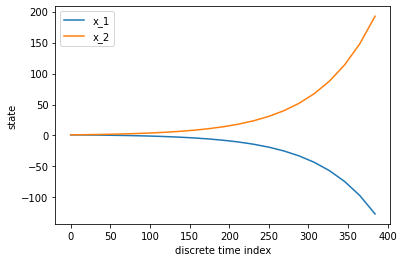

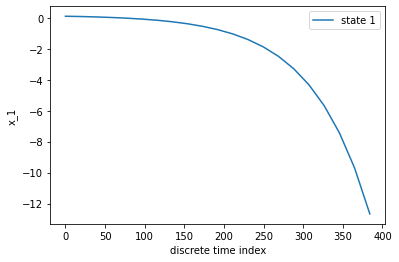

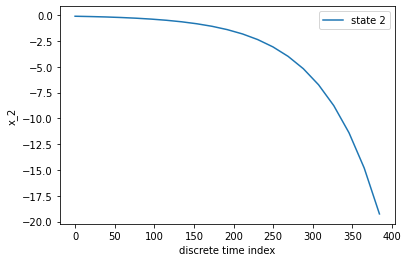

In [ ]:
# if the system is uncontrolled it has the following response 
# ---------- problem definition ---------- #
p        = {'A' : np.array([[1.0, 0.2],[0, 1.3]]), 'B' : np.array([[0.5, 0.5],[0.5, 0.5]]), 'D' : np.diag([0.1,0.1]), 'Y_nx' : 504.49}                 # model parameter definitions
nx                 = 2
nu                 = 2
epochs             = 10
episodes           = 10
nk                 = 20
x0                 = np.array([0.1,-0.1]) 
x0_var             = np.sqrt(abs(x0))*1e-5


system    = ModelIntegration(p)
controls  = np.zeros((nu, nk)) 
xt, tt    = system.simulation(controls,x0)


# --- visualising policy --- # 
print(tt.shape)
plt.figure(1)
for i in range(xt.shape[0]):
    plt.plot(tt,xt.squeeze()[i,:]/np.max(xt.squeeze()[i,:]))
plt.ylabel('state')
plt.xlabel('discrete time index')
plt.legend(['x_1', 'x_2'])
plt.show()

plt.figure(2)
plt.plot(tt[:],xt.squeeze()[0,:])
plt.ylabel('x_1')
plt.xlabel('discrete time index')
plt.legend(['state 1'])
plt.show()

plt.figure(3)
plt.plot(tt[:],xt.squeeze()[1,:])
plt.ylabel('x_2')
plt.xlabel('discrete time index')
plt.legend(['state 2'])
plt.show()

### **Neural Networks**
We want to identify a policy which is conditional to the current state of the process, $\mathbf{x}_t$. We propose to do this through policy approximation, i.e. we parameterize the policy with a function - i.e. a neural network. The NN will then interact with the process as follows:

<br>

<img src="https://drive.google.com/uc?export=view&id=1N9zM1ktYZlCOf-T7g4YA0dYpwhwzv39e" width="650" height ="200" >

<br>


In [ ]:
class Net(torch.nn.Module):
  # in current form this is a linear function (wouldn't expect great performance here)
  def __init__(self, **kwargs):
    super(Net, self).__init__()

    # Unpack the dictionary 
    self.args     = kwargs
    self.dtype    = torch.float
    self.use_cuda = torch.cuda.is_available() 
    self.device   = torch.device("cpu")

    # defining ANN topology 
    self.input_size = self.args['input_size']
    self.output_sz  = self.args['output_size']
    self.hs1        = 2
    self.hs2        = 3

    # defining layer 
    self.hidden1 = torch.nn.Linear(self.input_size, self.hs1 )
    self.hidden2 = torch.nn.Linear(self.hs1, self.hs2)
    self.output = torch.nn.Linear(self.hs2, self.output_sz)

    self.af     = torch.nn.Tanh()

  def forward(self, x):
    x           = torch.tensor(x.view(1,1,-1)).float()
    y           = self.af(self.hidden1(x))
    y           = self.af(self.hidden2(y))
    y           = self.output(y)

    return y.detach().numpy()


## **Updating parameters of policy networks by search based methods**
Due to the evaluate and search approach provided by this approach, as shown below, we have to find way to load the parameters to the network at each iteration of the search process. Network initialization, acesses and updating of parameters is shown in the code blocks below. 

<br>

<img src="https://drive.google.com/uc?export=view&id=1Zm1GWw9RLiTpb4TR-qsA8I8wpF49eYxo" width="340" height ="225" >

<br>

In [ ]:
# defining network hyperparameters 
hyparams = {'input_size': 2,
            'output_size': 2}

# initialising the policy network
ex_net = Net(**hyparams)
# Retrieving parameters of the policy network --> returns dictionary of parameters
params = ex_net.state_dict()

# creating random parameters in the range [-5, 5]
params2 = {k: torch.rand(v.shape)* (5 - -5) + -5 \
               for k, v in params.items()}      
# Updating policy parameters manually (not by backpropagation)
ex_net.load_state_dict(params2)
print(params2)

{'hidden1.weight': tensor([[-1.1716,  4.6015],
        [ 0.6150, -4.7556]]), 'hidden1.bias': tensor([-2.7063,  3.6540]), 'hidden2.weight': tensor([[ 3.3884,  3.0441],
        [-3.8443,  0.4979],
        [-2.8219, -4.8979]]), 'hidden2.bias': tensor([-3.2485,  1.0269, -2.1773]), 'output.weight': tensor([[ 1.1314,  0.0092,  1.1603],
        [ 3.5931, -4.5651, -4.8373]]), 'output.bias': tensor([0.4050, 2.6482])}


## **Defining Simulation**

In [ ]:
############################
# one episode run function #
############################

class Simulation(object):
  def __init__(self, sample_size, nk, nu, nx, x0, x0_var, model_params, param_bound, **kwargs):
    # --- unpacking arguments --- #
    self.sample_size = sample_size                                                                  
    self.nk, self.nu, self.nx, self.x0, self.x0_var = nk, nu, nx, x0, x0_var            
    self.policy = Net(**kwargs)
    self.ips, self.model_params    = {k: v.shape for k, v in self.policy.state_dict().items()}, model_params     # produces dictionary store of parameter shapes
    self.param_max, self.param_min = param_bound

  def run_episode(self, policy1, x0, model):
      '''
      This code is adapted for the optimization of a batch process, meaning a fixed final
      time, and a state as "time-to-termination"

      Single MC: Compute a single episode given a policy.
      input: Specification
      Output: Reward for each episode

      nk: number of steps, dis:, F, x0: initial state, u_min, u_max
      '''
      # --- unpacking arguments --- #
      sample_size = self.sample_size
      nk, nu, nx, x0, x0_var = self.nk, self.nu, self.nx, self.x0, self.x0_var
      
      # --- internal definitions --- #
      obj_indx         = 0

      # ----------- Initialize episode ----------- #
      u_trajectory = np.zeros([nk, nu]) 
      x_trajectory = np.zeros([nk, nx]) 

      # -- initial conditions -- #
      t   = 0.
      x_k = x0
      # -- final condition -- #
      tf  =  16.*24.
      dt  = tf/nk
      rtrns = 0


      # ---- Perform MC for each time interval of (nk) steps ---- #
      for ind in range(nk):

          # ----- normalizing inputs ----- #

          # ----- Compute next control action ----- #
          x_k_norm_torch          = torch.tensor((x_k))
          mean_uk                 = policy1(x_k_norm_torch)
          u_k                     = np.reshape(mean_uk, (nu, 1))

          # ----- we could put hard bounds on controls here ----- #


          # ----- compute next states from "real system" ----- #
          xt, rt   = model.step(x_k,u_k) 
          x_k_plus = xt[:,:]
          x_k      = x_k_plus
          rtrns    += rt

          # ----- storage of data ----- #
          u_trajectory[ind, :] = np.copy(u_k[:,:]).squeeze()
          x_trajectory[ind, :] = np.copy(x_k_plus).squeeze()

      
      # ----- return ----- #
      return rtrns, u_trajectory, x_trajectory

  ############################
  # Sample episodes function #
  ############################

  def sample_params(self):
    # samples parameters from uniform distribution on support defined by upper and lower bounds
    # and then load parameters into policy model
    # note that here we could provide some parameter values from a more intelligent optimization algorithm (this would then become a function of theta)
    params = {k: torch.rand(shape)* (self.param_max - self.param_min) + self.param_min \
               for k, shape in self.ips.items()}              
    self.policy.load_state_dict(params)

    return params


  def load_params(self, x):
    # loads parameters x into policy 
    params = {k: x[k] for k in self.ips.keys()}           
       
    self.policy.load_state_dict(params)

    return 

  def RL_simulation(self, validate = False):
      '''
      Perform all the MC's for a given candidate. This means we either evaluate the candidate once 
      in the case of a deterministic system and 50+ evaluations for stochastic systems.

      input: Policy, physical system, specifications
      output: expected reward, historical data
      '''
      # --- unpacking arguments --- #
      nk, nu, nx, x0, x0_var    = self.nk, self.nu, self.nx, self.x0, self.x0_var   
      sample_size, model_params = self.sample_size, self.model_params
      

      # ----- internal definitions ----- #
      rewards          = [None for _ in range(sample_size)]
   
      # historical data
      h_xs = np.zeros([sample_size, nk+1, nx])
      h_us = np.zeros([sample_size, nk, nu])
      
      # ----- loop over a number of episodes ----- #
      for epi in range(sample_size):

          model        = ModelIntegration(model_params)
          # Random intial conditions 
          x0_epi       = x0 + np.random.multivariate_normal(np.zeros(nx), np.diagflat(x0_var)) 
          
          # ----- Historical data ----- #
          h_xs[epi, 0, :]       = x0_epi
          reward, u_trajectory, x_trajectory = \
          self.run_episode(self.policy, x0_epi, model)
          h_xs[epi, 1:, :]      = x_trajectory
          h_us[epi, :, :]       = u_trajectory
          rewards[epi]          = reward


      # ----- Compute expectation and std pf reward ----- #
      reward_mean = np.mean(rewards)
      reward_std  = np.std(rewards)
          
      # ----- Return ----- #
      if validate:
        return reward_mean, reward_std, rewards, h_us, h_xs
      if not validate:
        return -reward_mean         # minimzation in random search




               

## **Random Search**


```
Random search 

input: define a policy model struture; upper and lower bounds on policy parameters; 
max. number of search trials (or other tolerance criterion; some probability density over the parameter space; initialise storage for best policy parameters and SAA of objective performance

for a number of iterations: 
  1. sample parameters from distribution over the search space
  2. evaluate the performance of those parameters through Monte Carlo rollouts to find the SAA of the objective.
  3. if best performing parameter setting, save parameters and associated performance
  4. if tolerance satisfied, then break

output: best performing policy

```


In [ ]:
def random_search(f,max_it, tol, metrics):
    """ 
    Input: function which takes a simulation object,
    then generates, evaluates and searches over policy parameters
    until exiting due to maximum compute or tolerance met 

    Output: opt_params, opt_val

    """
    i = 0
    while i < max_it: 
      
      pi_params_i = f.sample_params()           # sampling parameters
      saa         = f.RL_simulation()           # evaluating parameters via SAA
      
      if saa < metrics[1]:
        print(f'new global best at iteration {i}, saa of ise = {saa}')
        metrics[0] = pi_params_i 
        tol_m      = abs(metrics[1] - saa)
        metrics[1] = saa
        if tol_m < tol:
          print('exited due to tolerance')
          break
      i +=1 
    
          
    return metrics



### **Running Problem** 

In [ ]:
# define policy function to optimise weights of 
hypparams = {'input_size': 2,
          'output_size': 2}

In [ ]:
import datetime

# ---------- set random seed and timers ---------- #
torch.manual_seed(666)
now = datetime.datetime.now()
np.random.seed(seed=0)

# --- metrics + params for random search --- #
search_best_params = {}
search_best_reward = np.inf
max_it, tol        = 5000, 1e-3
dimension_bounds=[-5,5]   # bounds are important here 

f = Simulation(episodes, nk, nu, nx, x0, x0_var, p, dimension_bounds, **hypparams)

# perform optimisation 
opt_params, opt_val = random_search(f, max_it, tol, [search_best_params, search_best_reward])   
# validate optimal policy 
f.load_params(opt_params)
reward_mean, reward_std, rewards, h_us, h_xs = f.RL_simulation(validate = True)

np.save('control_profile.npy', h_us)
np.save('state_profile.npy', h_xs)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


new global best at iteration 0, saa of ise = 144522.29716031562
new global best at iteration 5, saa of ise = 49.903963310513966
new global best at iteration 17, saa of ise = 38.19446918970744
new global best at iteration 24, saa of ise = 1.739335215735108
new global best at iteration 533, saa of ise = 0.9237443654170956
new global best at iteration 1805, saa of ise = 0.8925074921896835


KeyboardInterrupt: ignored

In [ ]:
# fix for plotting controls
h_us_p = np.zeros((episodes, nk+1,nu))
h_us_p[:,:-1,:], h_us_p[:,-1,:] = h_us, h_us[:,-1,:]
h_us = h_us_p


(21,)


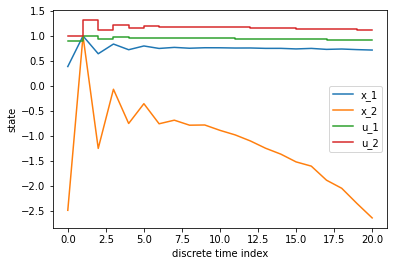

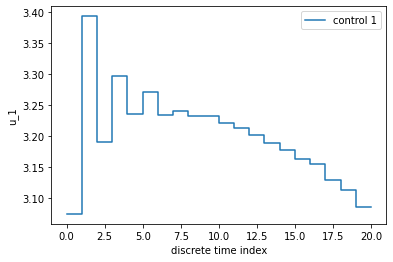

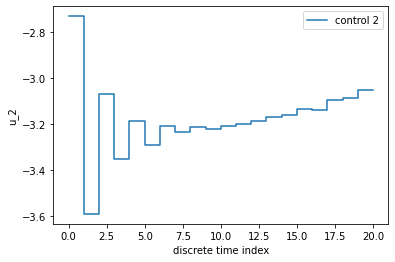

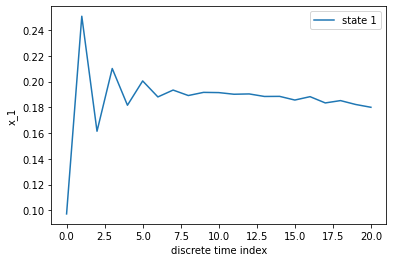

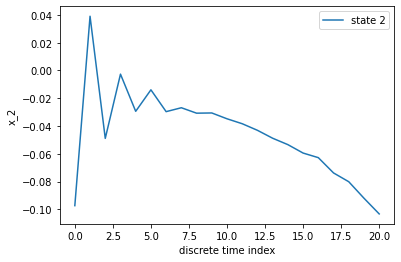

In [ ]:
kk =4
# --- visualising policy --- # 
tt = np.linspace(0, h_xs.shape[1]-1,h_xs.shape[1] )
print(tt.shape)
plt.figure(1)
for i in range(h_xs.shape[2]):
    plt.plot(tt,h_xs.squeeze()[kk,:,i]/np.max(h_xs.squeeze()[kk,:,i]))
for i in range(h_us.shape[2]):
  plt.step(tt[:],h_us[kk,:,i].squeeze()/np.max(h_us[kk,:,i].squeeze()), where='post')
plt.ylabel('state')
plt.xlabel('discrete time index')
plt.legend(['x_1', 'x_2', 'u_1', 'u_2'])
plt.show()

plt.figure(2)
plt.step(tt[:],h_us[kk,:,0].squeeze(), where='post')
plt.ylabel('u_1')
plt.xlabel('discrete time index')
plt.legend(['control 1'])
plt.show()

plt.figure(3)
plt.step(tt[:],h_us[kk,:,1].squeeze(), where='post')
plt.ylabel('u_2')
plt.xlabel('discrete time index')
plt.legend(['control 2'])
plt.show()

plt.figure(3)
plt.plot(tt[:],h_xs.squeeze()[kk,:,0])
plt.ylabel('x_1')
plt.xlabel('discrete time index')
plt.legend(['state 1'])
plt.show()

plt.figure(4)
plt.plot(tt[:],h_xs.squeeze()[kk,:,1])
plt.ylabel('x_2')
plt.xlabel('discrete time index')
plt.legend(['state 2'])
plt.show()



*   How can you improve the policy?
*   What properties of the system might make this 'learning problem' more difficult?

